#### Comparison of fiber statistics across conditions

**Author : ** Dhananjay Bhaskar

**Last Modified : ** Feb 24, 2019 

In [18]:
import pickle
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd

matplotlib.rc('xtick', labelsize=18) 
matplotlib.rc('ytick', labelsize=18) 
matplotlib.rcParams.update({'font.size':20})

In [10]:
rep1 = ['0034','0027','0016','0008','0001',
         '0055','0054','0039'] 

rep2 = ['0031','0024','0019','0010','0004',
         '0048','0043','0043'] 

rep3 = ['0037','0030','0022','0013','0005',
         '0051','0044','0044'] 

In [11]:
conditions = ['Col\n0.5 mg/ml', 'Col\n0.75 mg/ml', 'Col\n1 mg/ml', 'Col\n1.5 mg/ml', 'Col\n2 mg/ml',    
            'SilkCol\n5/1', 'SilkCol\n7.5/1', 'SilkCol\n10/1']

In [12]:
den_vals = list()

for i in range(len(conditions)):
    
    cond = conditions[i]
    
    den_vals_rep = list()
    
    for j in range(1, 4):
        if j == 1:
            well = rep1[i]
        elif j == 2:
            well = rep2[i]
        elif j == 3:
            well = rep3[i]
    
        FEATNAMES = well + '_cropped_fibFeatNames.csv'
        FIBFEATS = well + '_cropped_fibFeatures.csv'
        df_FEATNAMES = pd.read_csv(FEATNAMES, header=None)
        df_FIBFEATS = pd.read_csv(FIBFEATS, header=None)
    
        headings = list()
        for f_name in list(df_FEATNAMES[0]):
            feat = f_name.split(":")[1]
            feat = feat.lstrip()
            feat = feat.rstrip()
            headings.append(feat)
        df_FIBFEATS.columns = headings
    
        density = np.zeros([800,800])

        for index, row in df_FIBFEATS.iterrows():
            density[int(row['end point col'])-1,int(row['end point row'])-1] = row['box density 64']
            
       
        density_list = density.flatten()
        density_nz = density_list[np.nonzero(density_list)]
        den_vals_rep.extend(np.divide(density_nz, 64**2))
    
    den_vals.append(den_vals_rep)

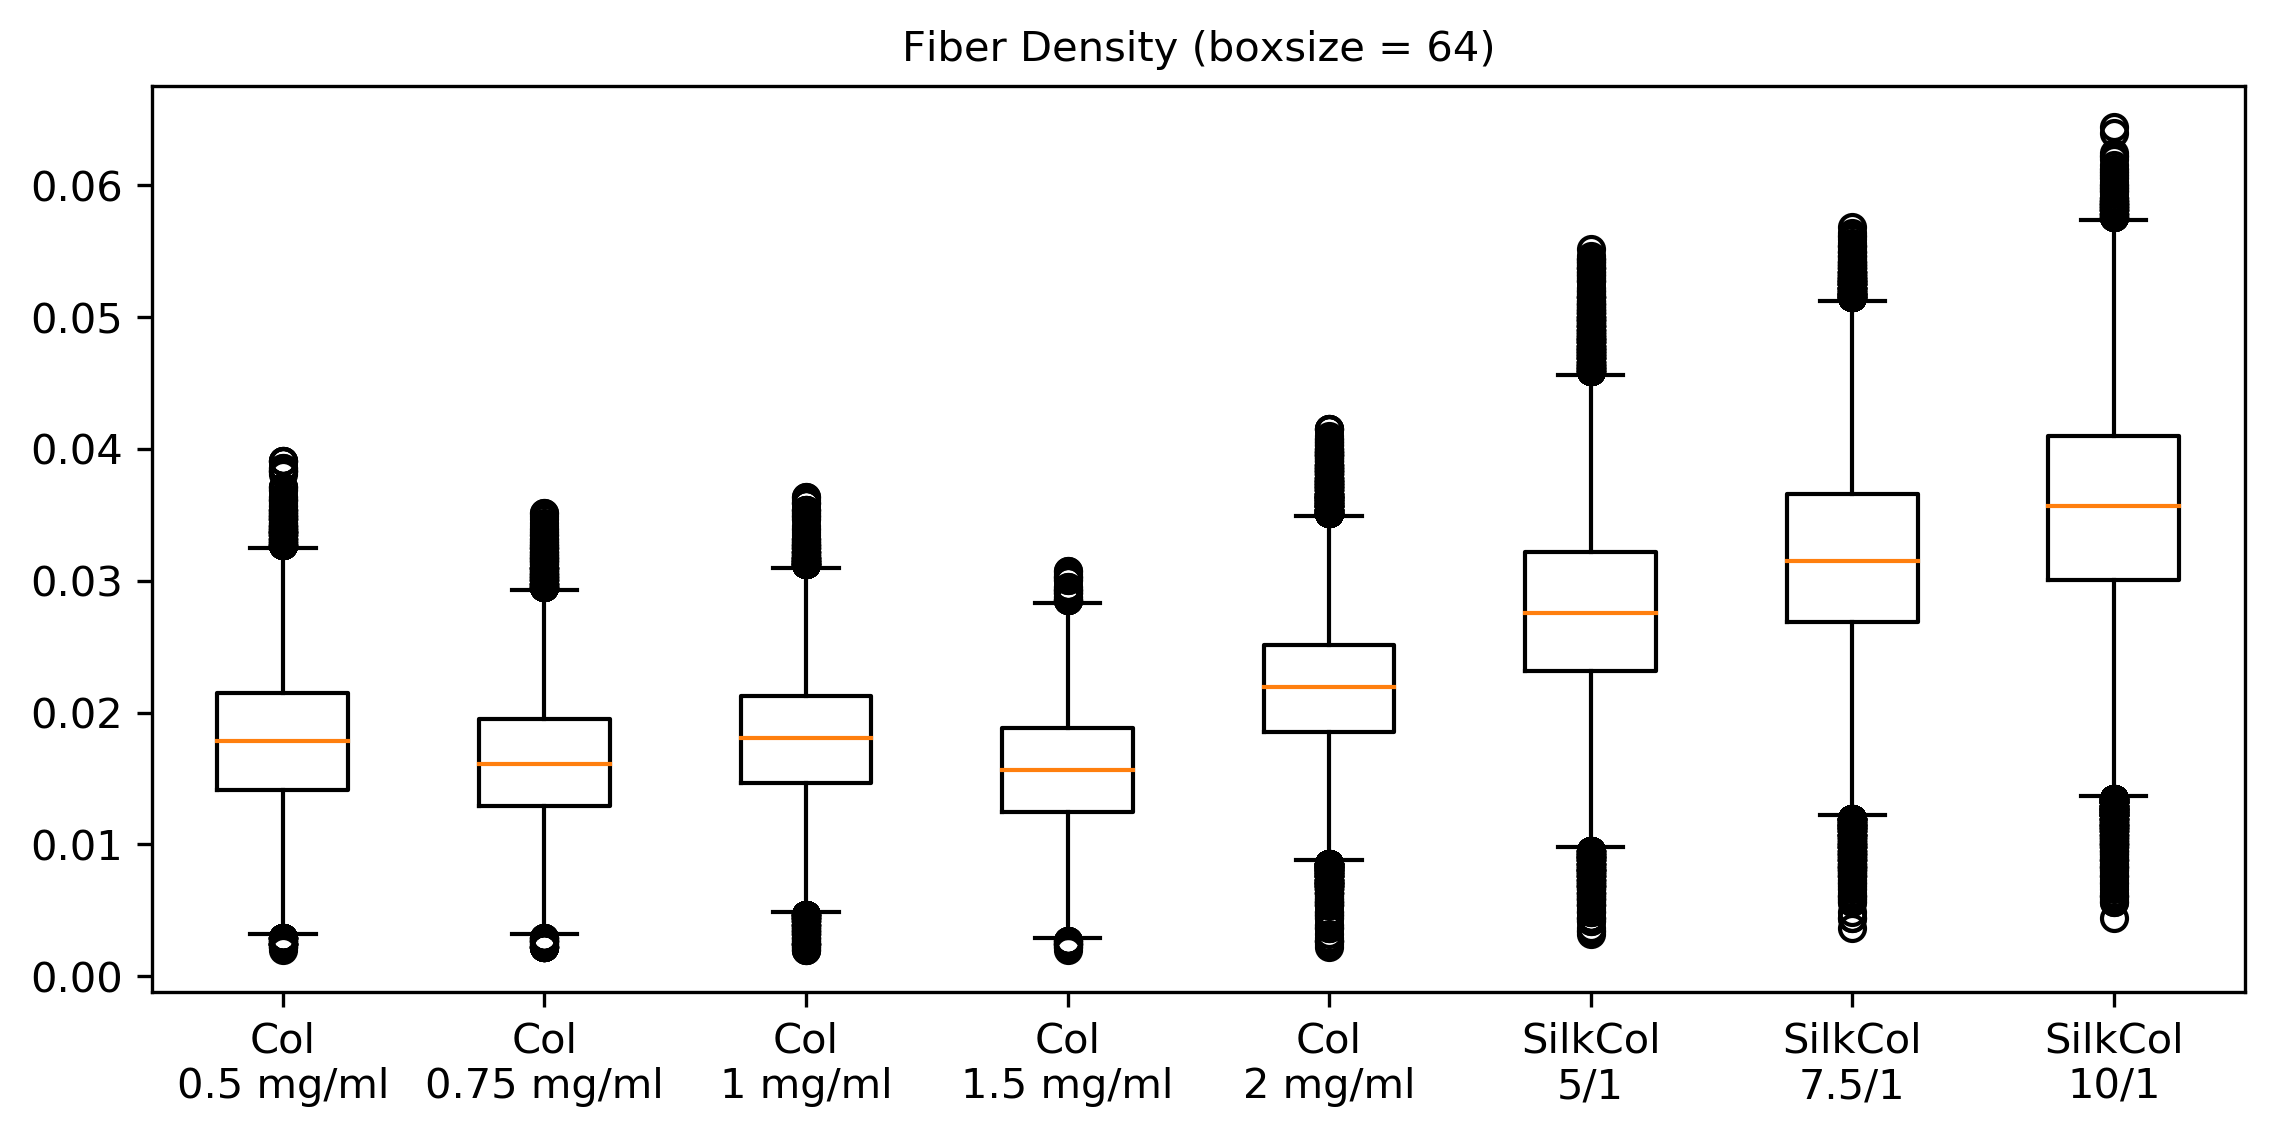

In [13]:
matplotlib.rc('xtick', labelsize=10) 
matplotlib.rc('ytick', labelsize=10) 
matplotlib.rcParams.update({'font.size': 16})

plt.figure(figsize=(9,4), dpi=300)
plt.title('Fiber Density (boxsize = 64)', fontsize=10)
plt.boxplot(den_vals, labels=conditions);
plt.savefig('boxsize64.png')

In [14]:
den_vals = list()

for i in range(len(conditions)):
    
    cond = conditions[i]
    
    den_vals_rep = list()
    
    for j in range(1, 4):
        if j == 1:
            well = rep1[i]
        elif j == 2:
            well = rep2[i]
        elif j == 3:
            well = rep3[i]
    
        FEATNAMES = well + '_cropped_fibFeatNames.csv'
        FIBFEATS = well + '_cropped_fibFeatures.csv'
        df_FEATNAMES = pd.read_csv(FEATNAMES, header=None)
        df_FIBFEATS = pd.read_csv(FIBFEATS, header=None)
    
        headings = list()
        for f_name in list(df_FEATNAMES[0]):
            feat = f_name.split(":")[1]
            feat = feat.lstrip()
            feat = feat.rstrip()
            headings.append(feat)
        df_FIBFEATS.columns = headings
    
        density = np.zeros([800,800])

        for index, row in df_FIBFEATS.iterrows():
            density[int(row['end point col'])-1,int(row['end point row'])-1] = row['box density 128']
            
       
        density_list = density.flatten()
        density_nz = density_list[np.nonzero(density_list)]
        den_vals_rep.extend(np.divide(density_nz,128**2))
    
    den_vals.append(den_vals_rep)

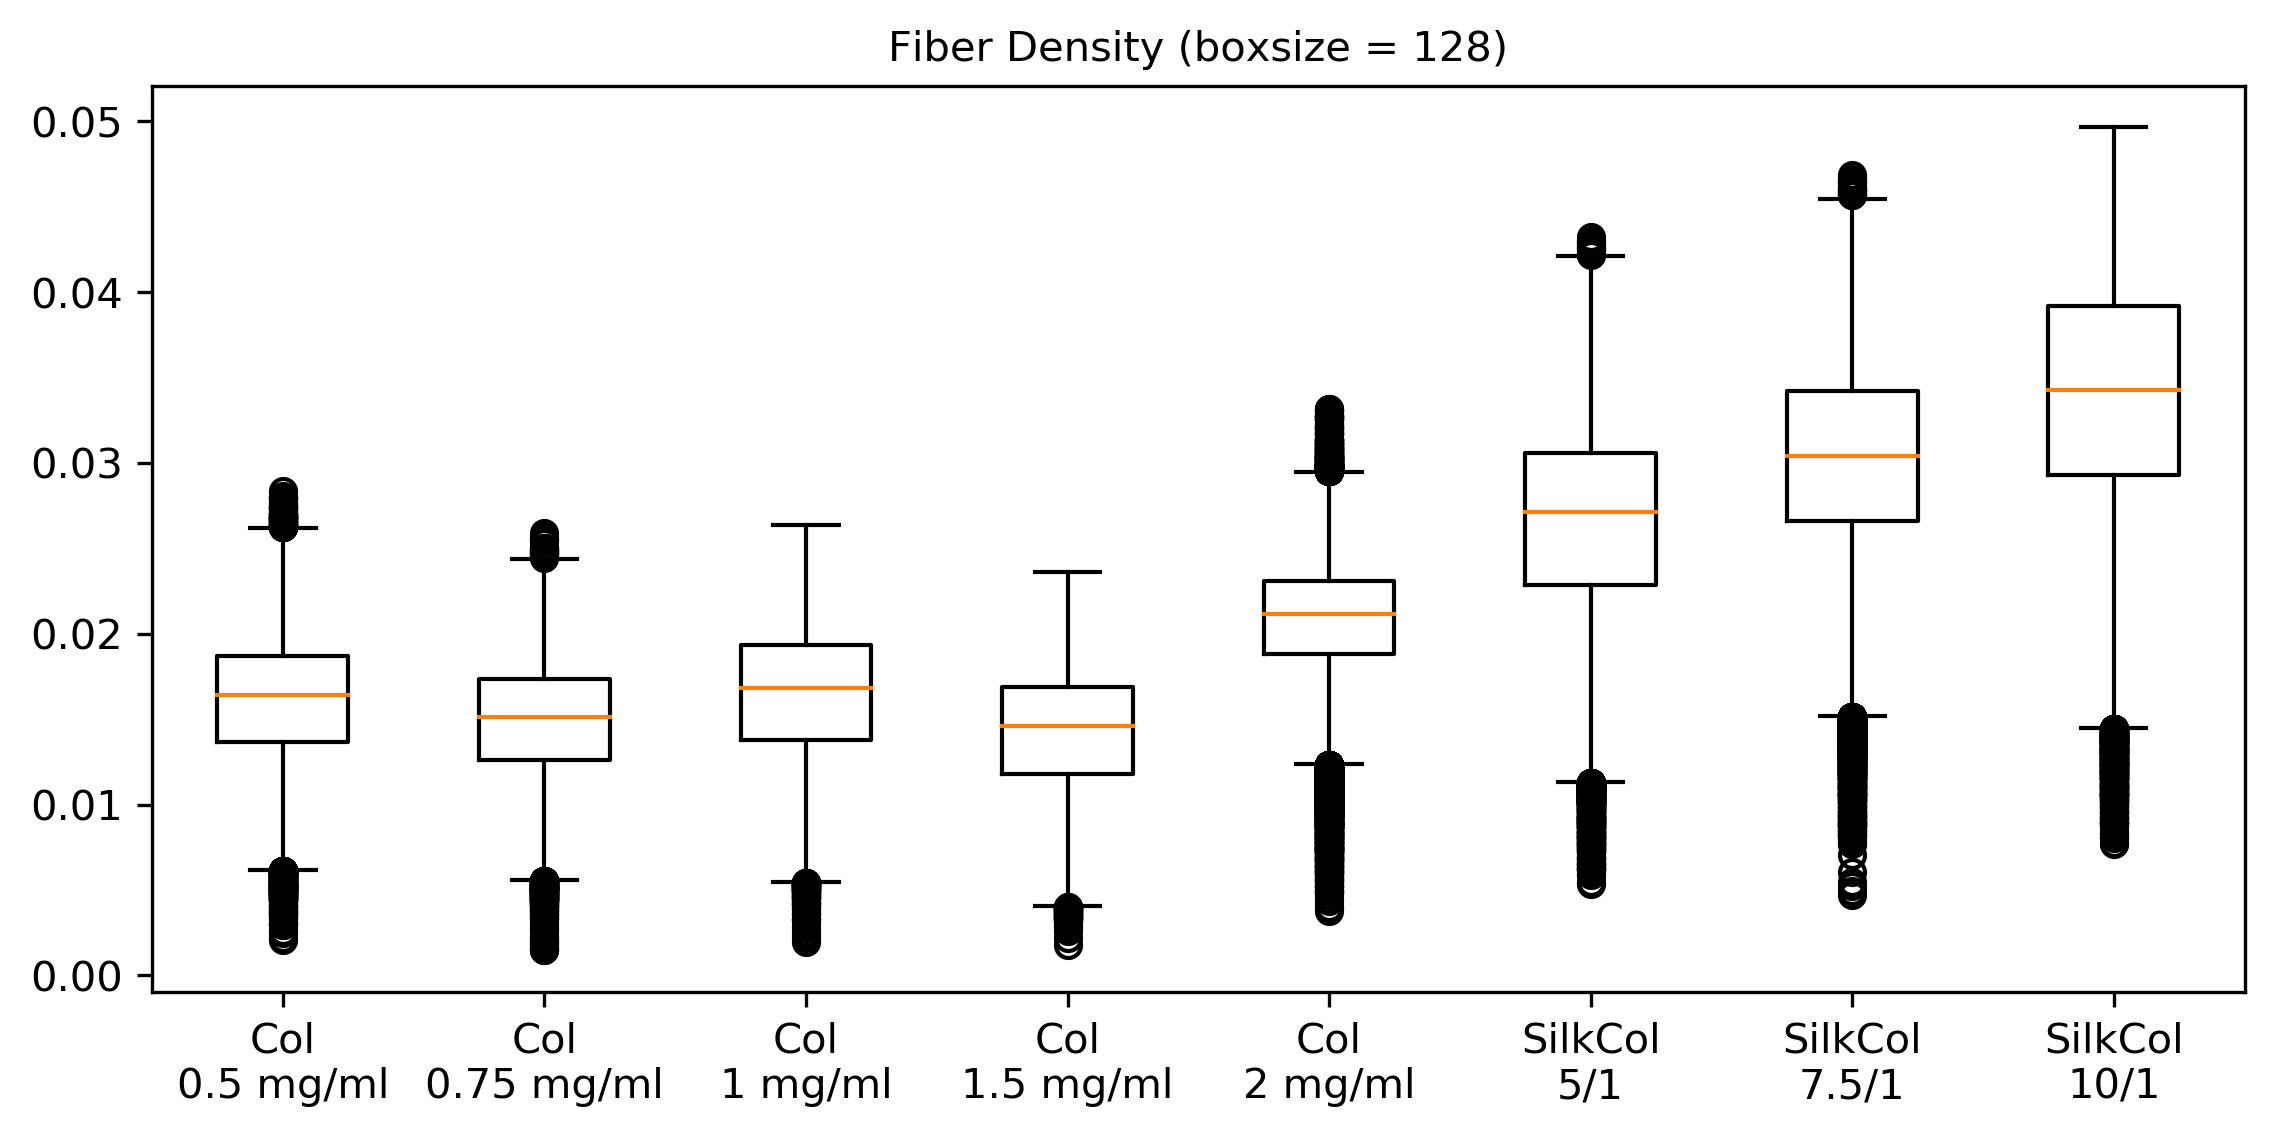

In [15]:
matplotlib.rc('xtick', labelsize=10) 
matplotlib.rc('ytick', labelsize=10) 
matplotlib.rcParams.update({'font.size': 16})

plt.figure(figsize=(9,4), dpi=300)
plt.title('Fiber Density (boxsize = 128)', fontsize=10)
plt.boxplot(den_vals, labels=conditions);
plt.savefig('boxsize128.png')

In [16]:
len_vals = list()
wid_vals = list()
fib_density_box = list()
fib_density_box_img = list()
mesh_area = list()
segmented_fibers = list()

boxsize = 50
px2um = 0.318
patch_area_um = (boxsize**2) * (px2um**2)

for i in range(len(conditions)):
    
    len_vals_rep = list()
    wid_vals_rep = list()
    fib_density_box_rep = list()
    mesh_area_rep = list()
    segmented_fibers_rep = list()
    fib_density_box_img_rep = list()
    
    for j in range(1, 4):
        
        if j == 1:
            well = rep1[i]
        elif j == 2:
            well = rep2[i]
        elif j == 3:
            well = rep3[i]
    
        p_file = well + "_fib_stats.pickle"
        with open(p_file, "rb") as f:
            (fib_len_um, fib_wid_um) = pickle.load(f)
        len_vals_rep.extend(fib_len_um)
        wid_vals_rep.extend(fib_wid_um)

        p_file = well + "_fibcount_boxsize_50.pickle"
        with open(p_file, "rb") as f:
            num_fibs = pickle.load(f)
        fib_density_box_rep.extend(num_fibs)

        p_file = well + "_boxcount.pickle"
        with open(p_file, "rb") as f:
            (boxcount_res, area_per_fiber, numfibs) = pickle.load(f)
        mesh_area_rep.append(area_per_fiber)
        segmented_fibers_rep.append(numfibs)

        p_file = well + "_imgcount.pickle"
        with open(p_file, "rb") as f:
            (box_sizes, avg_thresh_list, box_50_prop) = pickle.load(f)
        fib_density_box_img_rep.extend(box_50_prop)
        
    len_vals.append(len_vals_rep)
    wid_vals.append(wid_vals_rep)
    fib_density_box.append(fib_density_box_rep)
    mesh_area.append(mesh_area_rep)
    segmented_fibers.append(segmented_fibers_rep)
    fib_density_box_img.append(fib_density_box_img_rep)

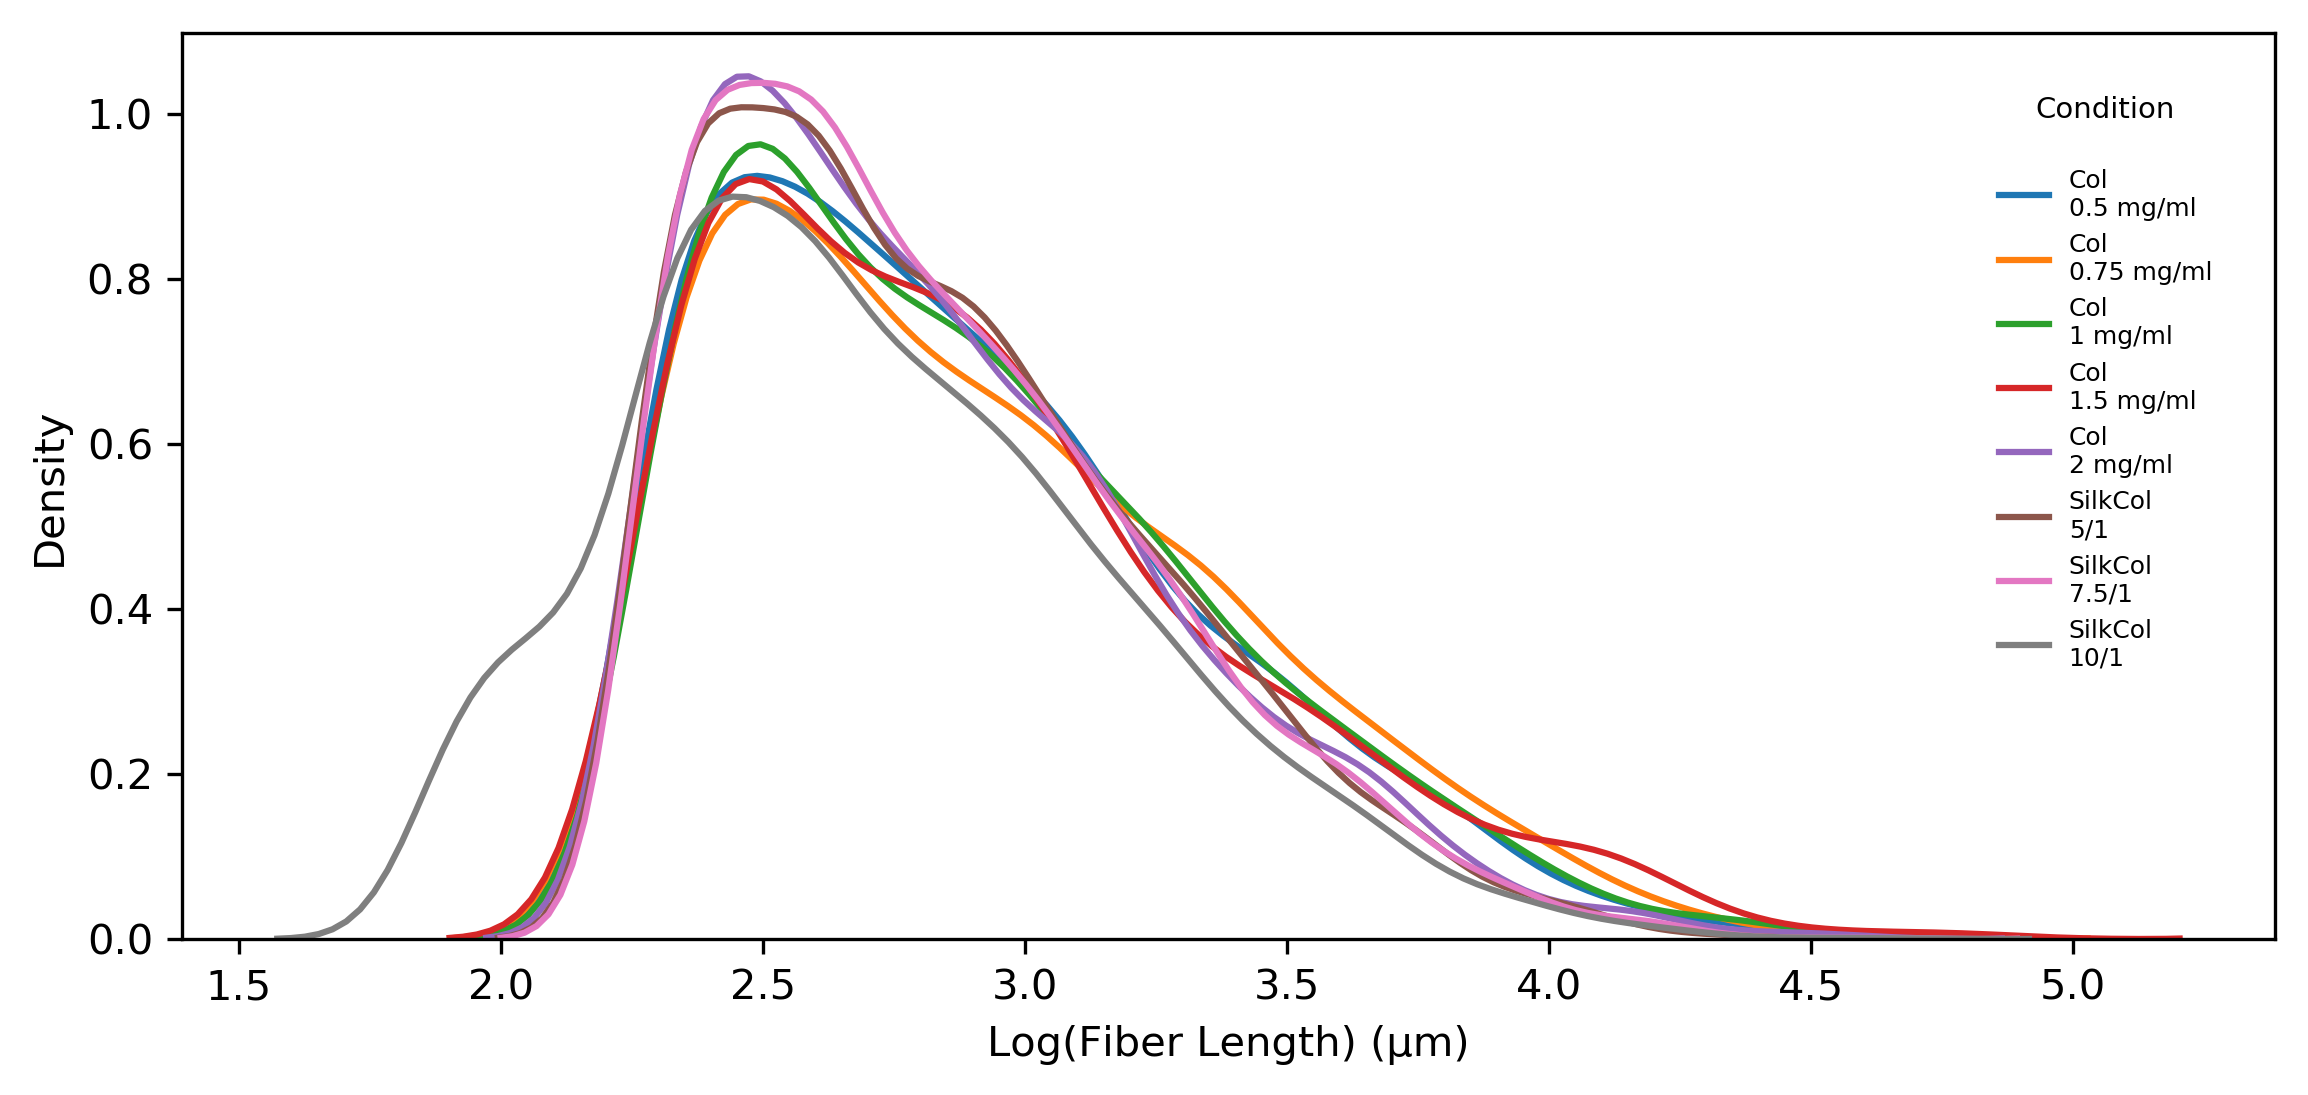

In [46]:
plt.figure(figsize=(9,4), dpi=300)
matplotlib.rcParams.update({'font.size': 7})
matplotlib.rc('xtick', labelsize=10) 
matplotlib.rc('ytick', labelsize=10) 

for j in range(len(len_vals)):
    sns.distplot(np.log(len_vals[j]), hist=False, kde=True, kde_kws={'linewidth':1.5}, label=conditions[j])
    
plt.legend(prop={'size': 6}, title = 'Condition\n', borderpad=2, frameon=False)
plt.xlabel(u'Log(Fiber Length) (μm)', fontsize=10)
plt.ylabel('Density', fontsize=10);

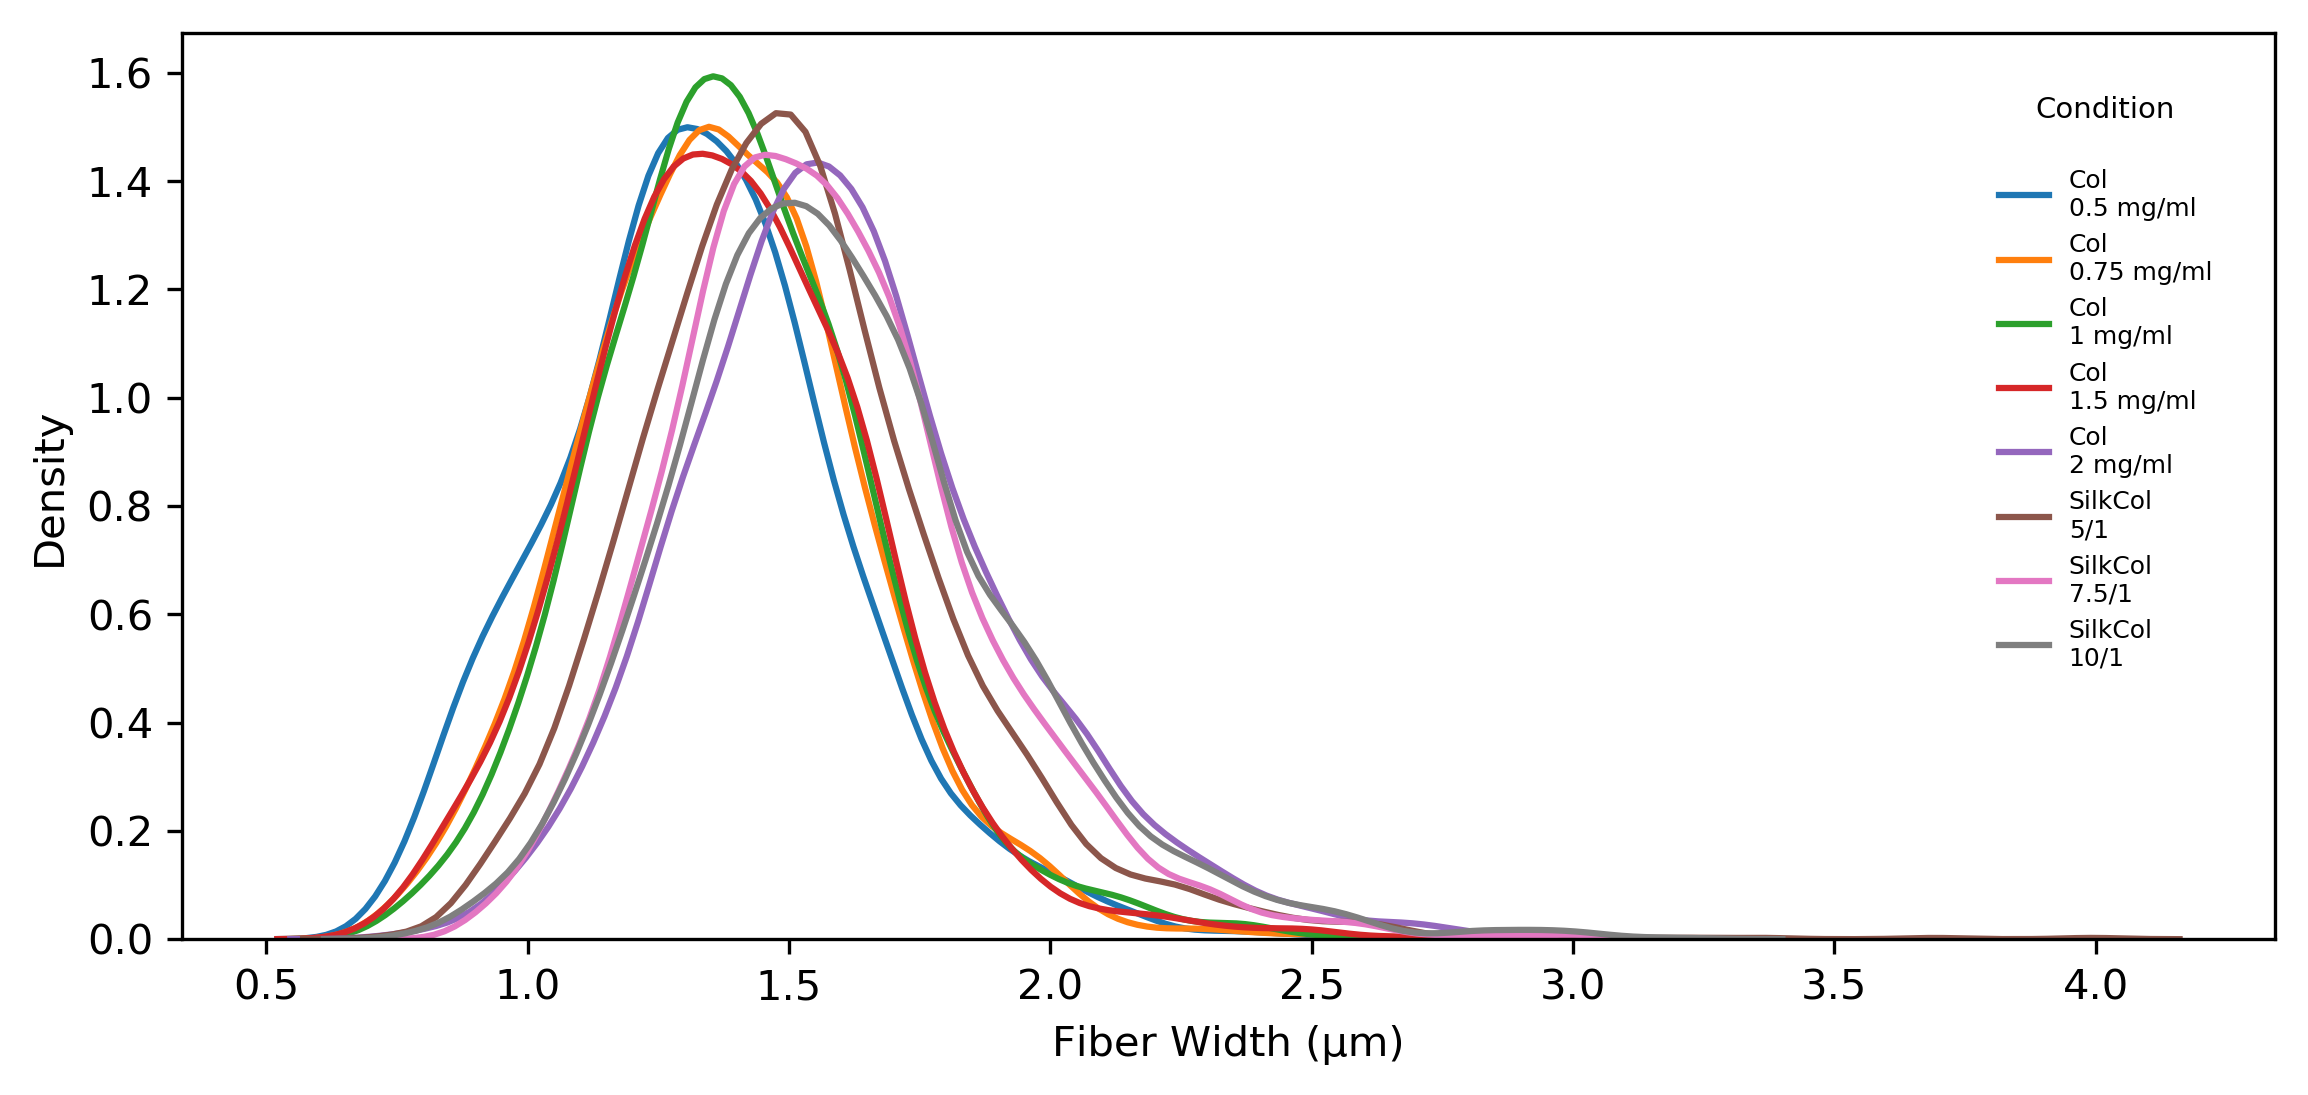

In [49]:
plt.figure(figsize=(9,4), dpi=300)
matplotlib.rcParams.update({'font.size': 7})
matplotlib.rc('xtick', labelsize=10) 
matplotlib.rc('ytick', labelsize=10) 

for j in range(len(wid_vals)):
    sns.distplot(wid_vals[j], hist=False, kde=True, kde_kws={'linewidth':1.5}, label=conditions[j])
    
plt.legend(prop={'size': 6}, title = 'Condition\n', borderpad=2, frameon=False)
plt.xlabel(u'Fiber Width (μm)', fontsize=10)
plt.ylabel('Density', fontsize=10);

In [ ]:
matplotlib.rc('xtick', labelsize=9) 
matplotlib.rc('ytick', labelsize=9) 
matplotlib.rcParams.update({'font.size': 10})

plt.figure(figsize=(3.25,2), dpi=300)
#plt.title(u'Number of fibers in box (boxsize = ' + repr(patch_area_um) + u' μm^2 = 2500 pixels)', fontsize=10)
#plt.ylabel('Number of fibers')
#plt.xlabel('[mg/ml]')
labels = ['0.5','0.75','1', '1.5', '2', '5:1', '7.5:1', '10:1']
plt.boxplot(fib_density_box, labels=labels);
plt.savefig('Numfibperbox.png', dpi = 150)

In [67]:
pandadf = pd.DataFrame(np.array(fib_density_box))
fib_density_box_pd = pandadf.T.rename(columns={0: "0.5", 1: "0.75", 2:"1", 3:"1.5", 4:"2", 5:"5:1", 6: "7.5:1", 7:"10:1"})
#fib_density_box_pd.to_csv('fibdensitybox.csv')

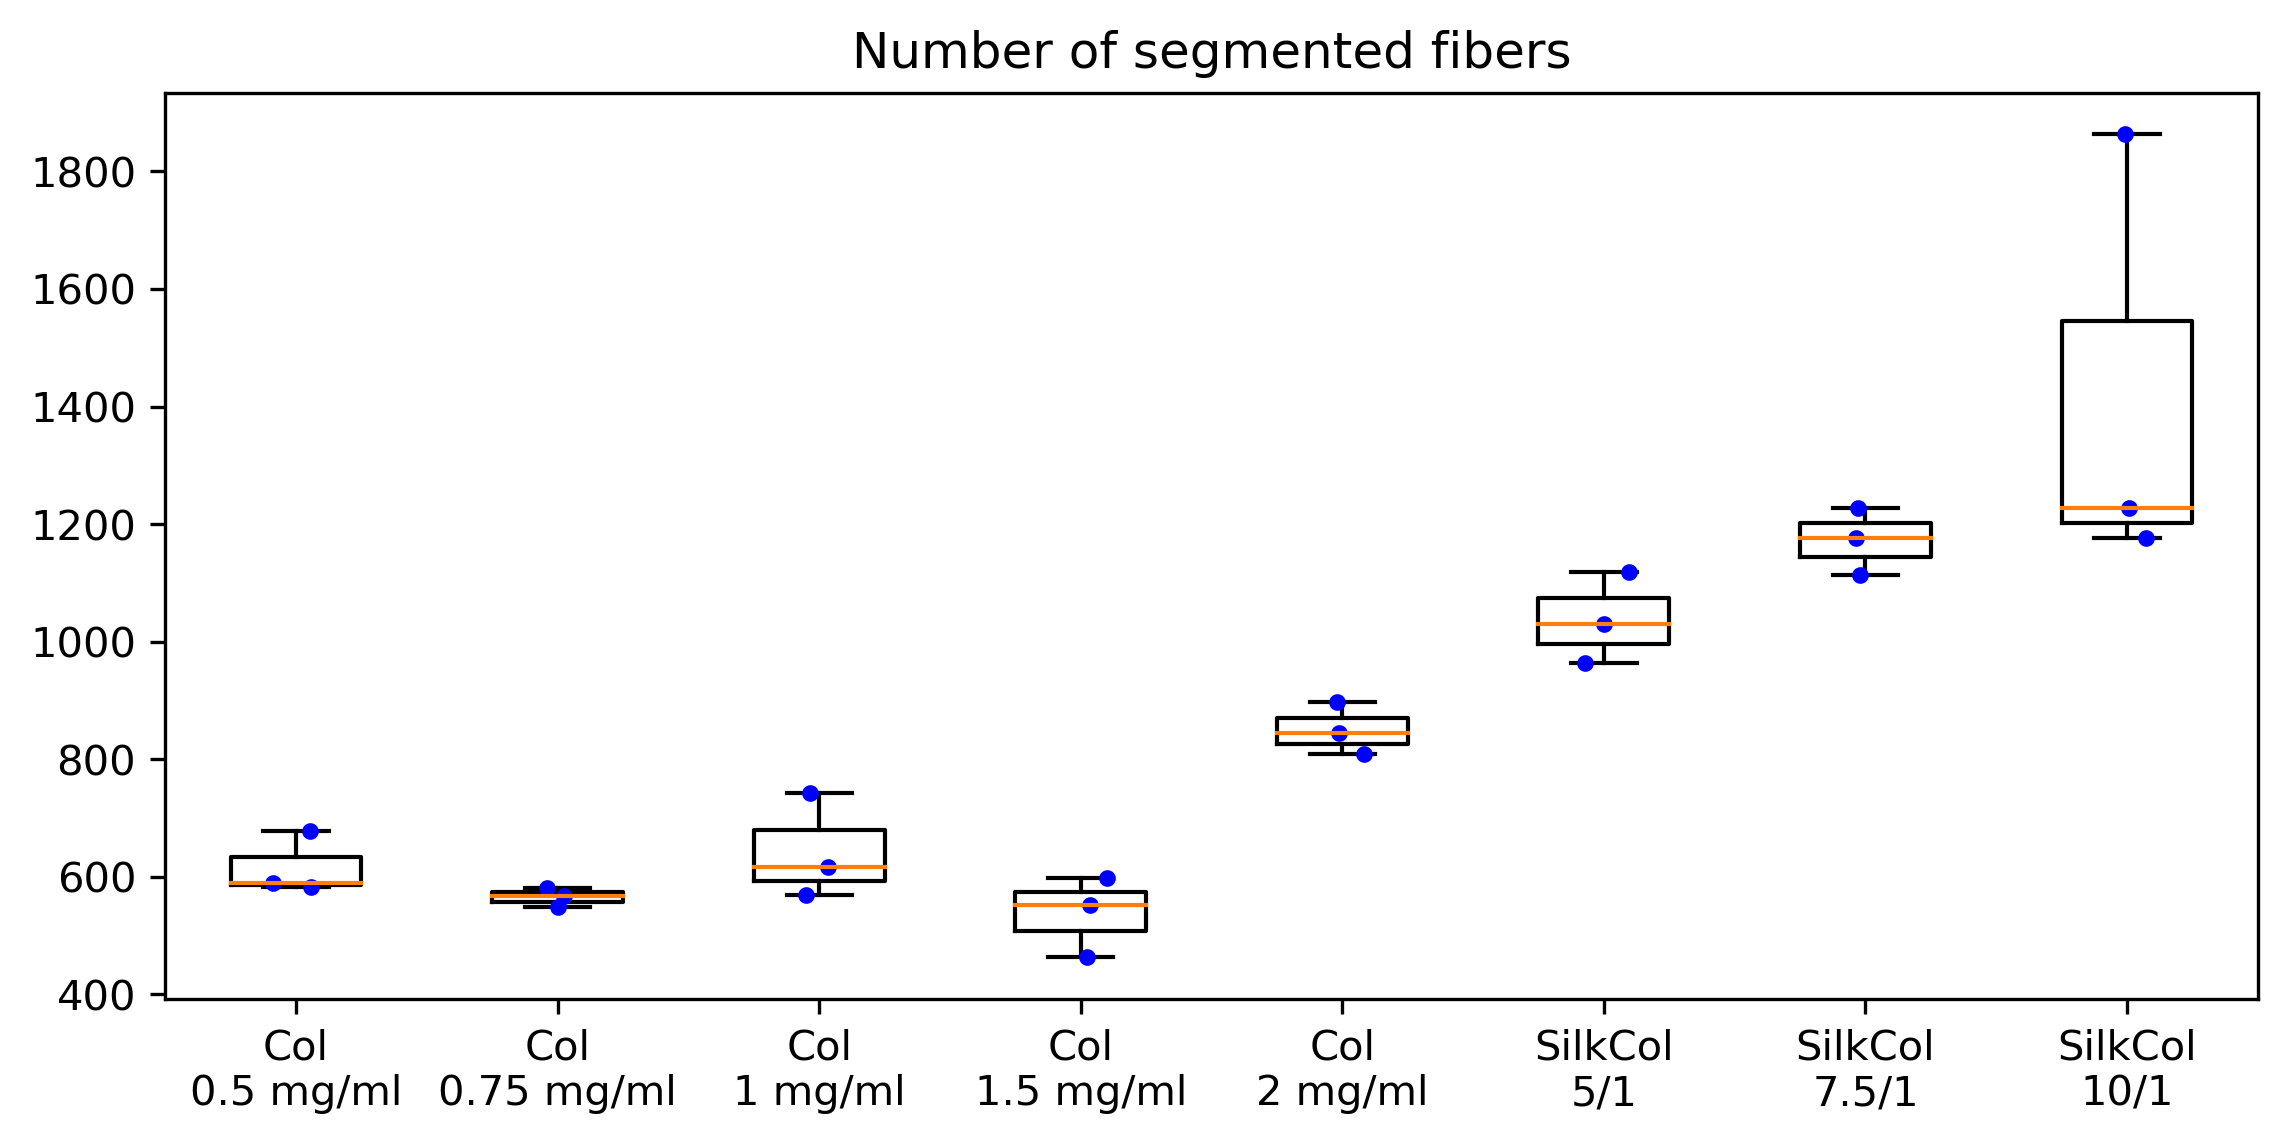

In [12]:
plt.figure(figsize=(9,4), dpi=300)
plt.boxplot(segmented_fibers, labels=conditions)
for k in range(len(conditions)):
    seg = segmented_fibers[k]
    x = np.random.normal(k+1, 0.05, size=len(seg)) 
    plt.plot(x, seg, 'b.')
plt.title('Number of segmented fibers', fontsize=12)
plt.show()

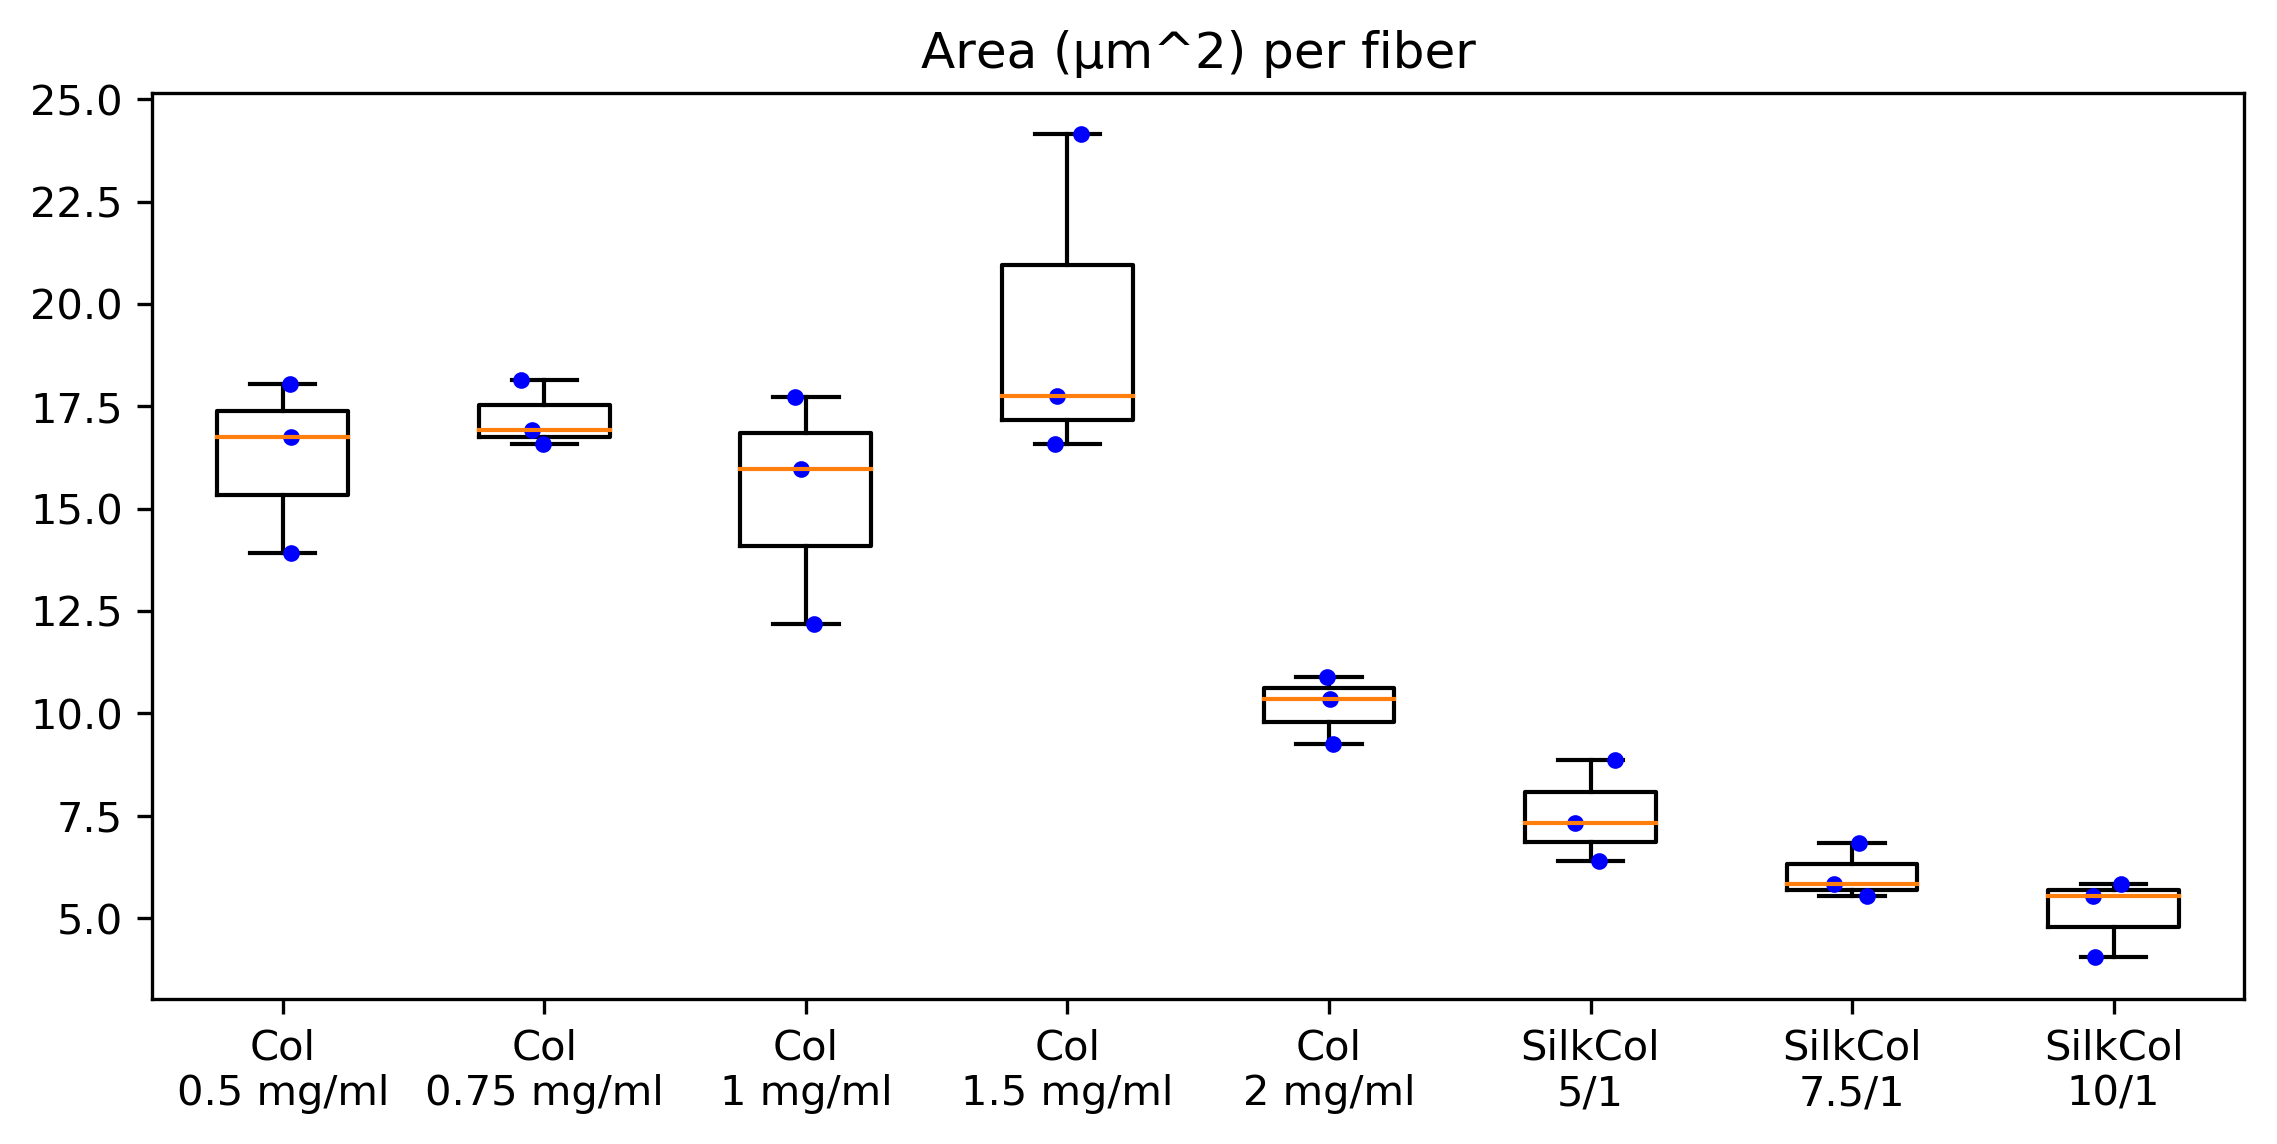

In [13]:
plt.figure(figsize=(9,4), dpi=300)
plt.boxplot(mesh_area, labels=conditions)
for k in range(len(conditions)):
    ma = mesh_area[k]
    x = np.random.normal(k+1, 0.05, size=len(seg)) 
    plt.plot(x, ma, 'b.')
plt.title(u'Area (μm^2) per fiber', fontsize=12)
plt.show()

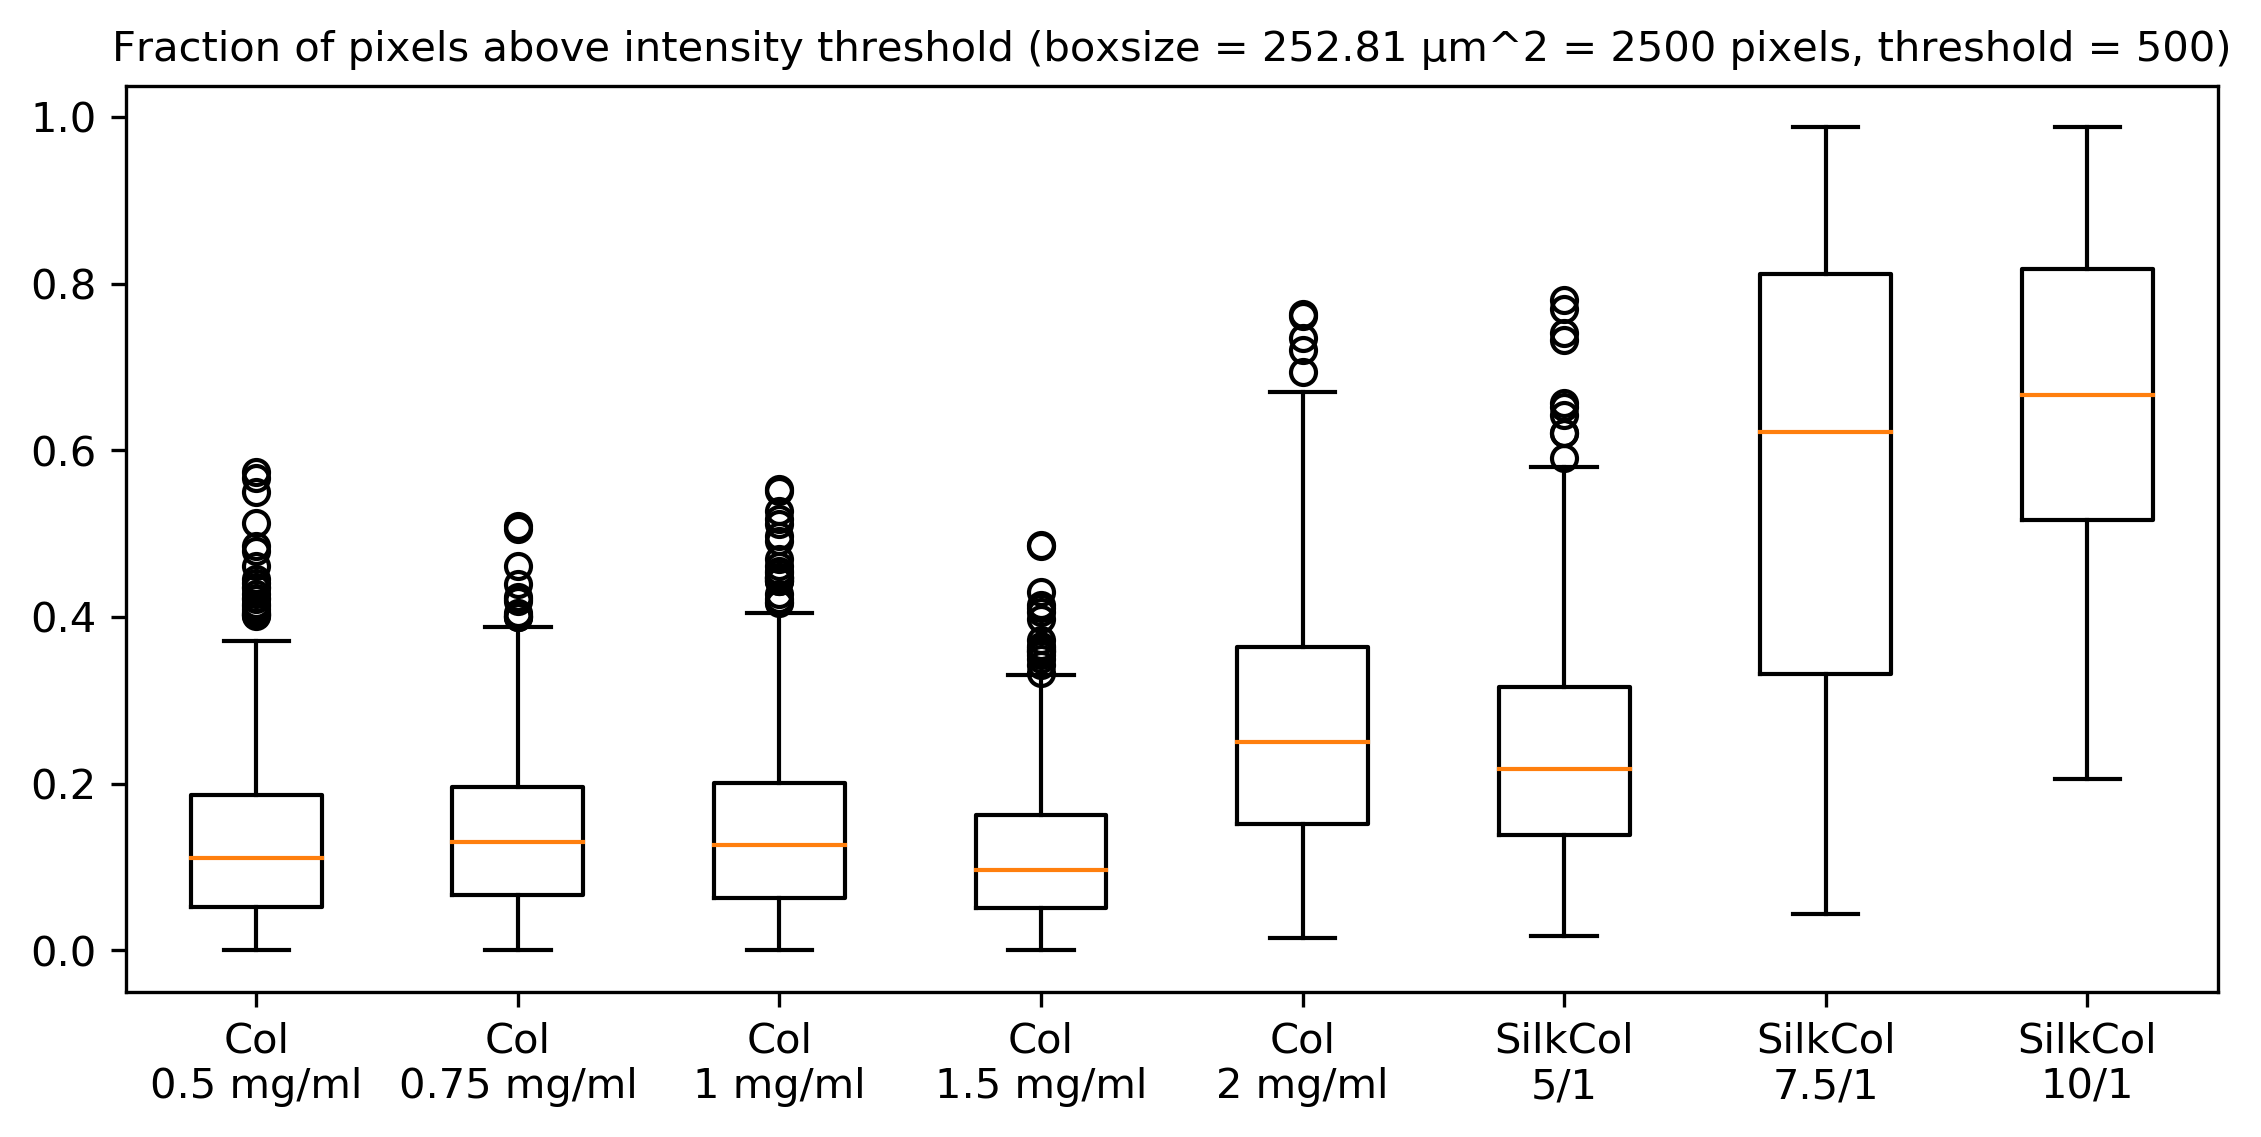

In [14]:
matplotlib.rc('xtick', labelsize=10) 
matplotlib.rc('ytick', labelsize=10) 
matplotlib.rcParams.update({'font.size': 16})

plt.figure(figsize=(9,4), dpi=300)
plt.title(u'Fraction of pixels above intensity threshold ' + 
          '(boxsize = ' + repr(patch_area_um) + u' μm^2 = 2500 pixels, threshold = 500)', fontsize=10)
plt.boxplot(fib_density_box_img, labels=conditions);